# Interaction Effects

Open in Colab: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/febse/econ2025/blob/main/10-Interaction-Effects.ipynb)


In [1]:
library(tidyverse)

# Load the data
stu <- read.csv("https://raw.githubusercontent.com/febse/data/main/econ/drinking.csv") %>%
  mutate(
    sex = ifelse(male == 1, "M", "F")
  )

# Print the first few rows
stu %>% head()

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


,male,drink,gpa,malegpa,sex
,<int>,<int>,<dbl>,<dbl>,<chr>
1,1,5,3.20,3.20,M
2,0,9,3.00,0.00,F
3,1,29,2.85,2.85,M
4,0,22,NA,NA,F
5,0,19,NA,NA,F
6,1,19,NA,NA,M


In [ ]:
# Plot the data and overlay the regression line for gpa ~ drinks


Estimate and interpret the results of the following models:

- $\text{gpa}_i = \beta_0 + \beta_1 \text{drink}_i + e_i$
- $\text{gpa}_i = \beta_0 + \beta_1 \text{sexMale}_i + e_i$
- $\text{gpa}_i =\beta_0 + \beta_1 \text{drink}_i + \beta_2 \text{sexMale}_i + e_i$
- $\text{gpa}_i = \beta_0 + \beta_1 \text{drink}_i + \beta_2 \text{sexMale}_i +
\beta_3 \text{gpa}_i \cdot \text{sexMale}_i$

## Polynomial regression

- Sample 100 observations from the following model. Assume that $x_i$ is uniformly distributed between -4 and 3.

$$
y_i = 2 + x_i + x^2 + e_i, e_i \sim N(0, 1)
$$

- Fit a linear regression model to the data, plot the data in a scatterplot and add the estimated regression line.
- Calculate the residuals and plot them against the fitted values. What do you observe?



In [ ]:
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#

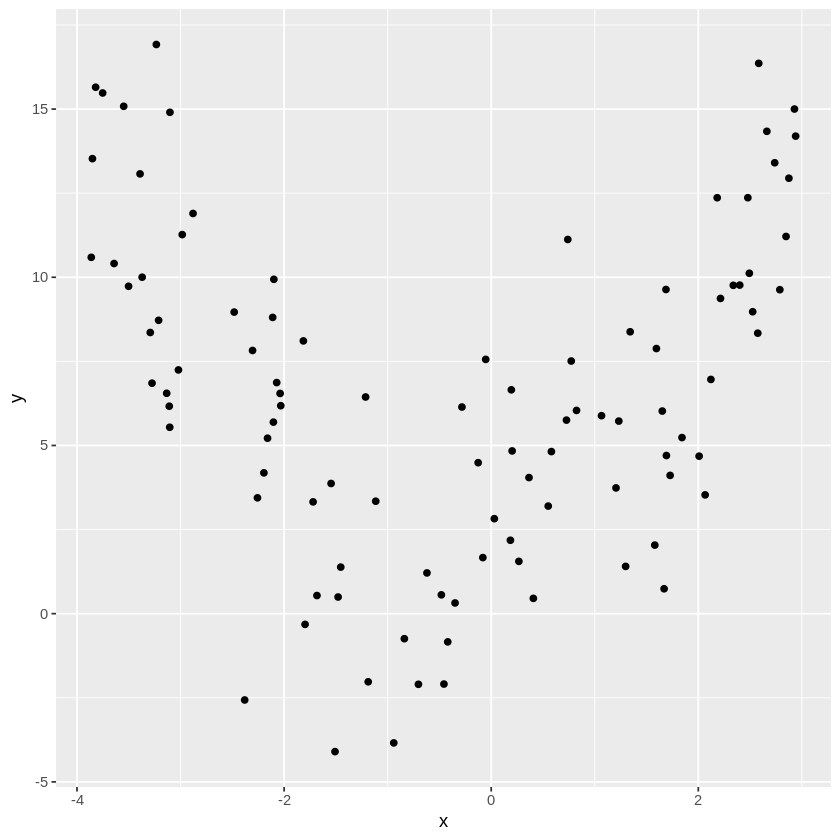

In [40]:
## Create the simulated sample
sim_n <- 100

poly_dt <- tibble(
  x = runif(n = sim_n, min = -4, max = 3),
  y = 2 +  x +  x^2 + rnorm(n = sim_n, mean = 0, sd = 3)
)

poly_dt %>%
  ggplot(aes(x = x, y = y)) +
  geom_point()



2.  Estimate a linear model for `x` and `y`

$$
y_i = \beta_0 + \beta_1 x_i, e_i \sim N(0, \sigma^2)
$$


In [47]:
fit1 <- lm(y ~ poly(x, 1), data = poly_dt)
fit1


Call:
lm(formula = y ~ poly(x, 1), data = poly_dt)

Coefficients:
(Intercept)   poly(x, 1)  
     6.5227       0.2923  


In [48]:
fit1_pred <- predict(
  fit1,
  interval = "confidence"
  ) %>%
  as_tibble() %>%
  bind_cols(poly_dt)

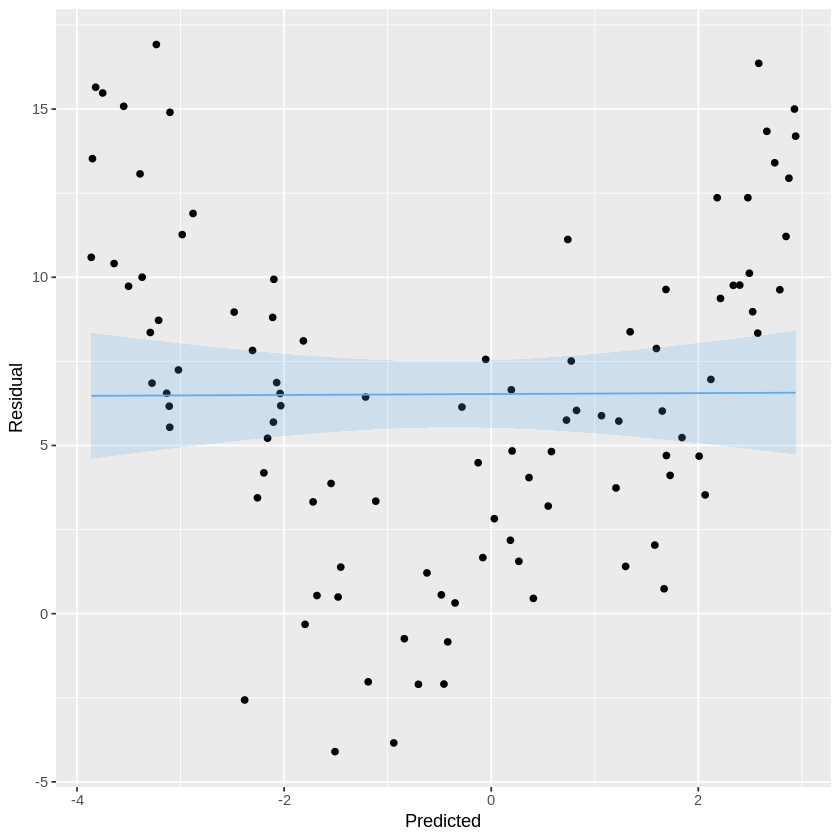

In [49]:
fit1_pred %>%
  ggplot(aes(x = x, y = y)) +
  geom_point() +
  geom_line(aes(x = x, y = fit), color = "steelblue2") +
  geom_ribbon(
    aes(ymin = lwr, ymax = upr),
    alpha = 0.2,
    fill = "steelblue2"
  ) +
  labs(
    x = "Predicted",
    y = "Residual"
  )


3.  Add a quadratic term to the linear model and estimate it

$$
y_i = \beta_0 + \beta_1 x_i + \beta_2 x^2_i + e_i, e_i \sim N(0, \sigma^2)
$$


In [ ]:
# fit2_pred <- predict(fit2, interval = "confidence") %>%
#   as_tibble() %>%
#   bind_cols(poly_dt) %>%
#   mutate(
#     res = y - fit
#   )

In [ ]:
# fit2_pred %>%
#   ggplot(aes(x = x, y = y)) +
#   geom_point() +
#   geom_line(
#     aes(y = fit),
#     color = "steelblue2"
#   ) +
#   geom_ribbon(
#     aes(ymin = lwr, ymax = upr),
#     alpha = 0.2,
#     fill = "steelblue2"
#   )

In [ ]:
# fit2_pred %>%
#   ggplot(aes(x = fit, y = res)) +
#   geom_point() +
#   geom_hline(yintercept = 0, alpha = 0.5, lty = 2) +
#   labs(
#     x = "Predicted",
#     y = "Residual"
#   )

4.  Add the third and fourth degree polynomial terms to the model and estimate it

$$
y_i = \beta_0 + \beta_1 x_i + \beta_2 x^2_i + \beta_3 x^3_i + \beta_4 x^4_i + e_i, e_i \sim N(0, \sigma^2)
$$

In [ ]:
# fit3_pred <- predict(fit3, interval = "confidence") %>%
#   as_tibble() %>%
#   bind_cols(poly_dt) %>%
#   mutate(
#     res = y - fit
#   )

In [ ]:
# fit3_pred %>%
#   ggplot(aes(x = x, y = y)) +
#   geom_point() +
#   geom_line(
#     aes(y = fit),
#     color = "steelblue2"
#   ) +
#   geom_ribbon(
#     aes(ymin = lwr, ymax = upr),
#     alpha = 0.2,
#     fill = "steelblue2"
#   )

In [ ]:
# fit3_pred %>%
#   ggplot(aes(x = fit, y = res)) +
#   geom_point() +
#   geom_hline(yintercept = 0, alpha = 0.5, lty = 2) +
#   labs(
#     x = "Predicted",
#     y = "Residual"
#   )

## Model choice

1. The residual sum of squares (RSS) is defined as:

$$
RSS = \sum_{i = 1}^{n}(y_i - \hat{y}_i)^2
$$

where $y_i$ is the observed value, $\hat{y}_i$ is the predicted value, and $n$ is the number of observations.

2. The mean squared error (MSE) is defined as:

$$
\text{MSE} = \frac{\text{RSS}}{n} =  \frac{1}{n} \sum_{i = 1}^{n}(y_i - \hat{y}_i)^2
$$

3. The root mean squared error (RMSE) is defined as:

$$
\text{RMSE} = \sqrt{\text{MSE}} = \sqrt{\frac{1}{n} \sum_{i = 1}^{n}(y_i - \hat{y}_i)^2}
$$

4. R-squared ($R^2$)

$$
R^2 = 1 - \frac{RSS}{TSS} \\
RSS = \sum_{i = 1}^{n}(y_i - \hat{y}_i)^2 \\
TSS = \sum_{i = 1}^{n}(y_i - \bar{y})^2
$$

Compute $R^2$ for the three models. Which model fits the data best according to it?

Generate test data from the same model and compute the RSS, MSE, RMSE, and $R^2$ for the test data.


In [ ]:
sim_noconst <- tibble(
  y = 2 + rnorm(n = 100, mean = 0, sd = 1),
  x = runif(n = 100)
)

sim_noconst %>%
  ggplot(aes(x = x, y = y)) +
  geom_point()

2.  Adjusted $R^2$

$$
R^2_{ADJ} = 1 - \frac{n - 1}{n - p - 1} \frac{RSS}{TSS}
$$

3.  Information Criteria

Compute the Akaike information criterion (AIC) for the three models and choose the best one.

$$
\text{AIC} = n \log\left(\frac{RSS}{n}\right) + 2p + n + n \log(2\pi).
$$

In [ ]:
AIC(fit1)
AIC(fit2)
AIC(fit3)

In [ ]:
smpl <- sample(1:100, 20)
poly_dt_estim <- poly_dt[smpl, ]
poly_dt_test <- poly_dt[-smpl, ]

fit2_estim <- lm(y ~ poly(x, 4), data = poly_dt_estim)
fit5_test <- lm(y ~ poly(x, 4), data = poly_dt_test)

pred2 <- predict(fit2_estim, newdata = poly_dt_estim)
pred5 <- predict(fit2_estim, newdata = poly_dt_estim)